# COVID-19 EDA

## Step 1: Review and undestand the datasets

## Step 2: Data cleaning

Already completed in individual `.ipynb` files.

## [Step 3: Merge or Join Datasets](#Step-3--Merge-Datasets-&-Further-Processing)

- Identify key columns: Determine which columns will serve as keys for merging or joining datasets. These could be geographic identifiers, dates, or other common fields.
- Choose the right type of merge/join: Decide on the type of join (inner, outer, left, right) based on the relationship between your datasets and the need to preserve rows from one or both datasets.
- Use Pandas `.merge()` method to combine datasets into a single DataFrame for analysis.

## [Step 4: Exploratory Data Analysis](#Step-4--Exploratory-Data-Analysis)

- Descriptive Statistics
- Histograms
- Box plots

## [Step 5: Investigate Correlations and Insights](#Step-5--Correlation-Analysis)

- **Correlation analysis:** Use **correlation coefficients** to investigate the strength and direction of the relationship between COVID-19 deaths and factors.
- **Visualizations:** Leverage visualizations such as **heatmaps** and **scatter plots** to help identify patterns or trends.

## Step 1 & 2:

Already completed in individual `.ipynb` files.

## Step 3- Merge Datasets & Further Processing

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import pearsonr

### 3.1. Load the datasets

In [2]:
# Load the datasets
df_edu = pd.read_csv('cleaned_education.csv')
df_sex = pd.read_csv('cleaned_sex.csv')
df_pop = pd.read_csv('cleaned_pop.csv')
df_heart = pd.read_csv('cleaned_heart_motality_rate.csv')

In [3]:
# Check the datasets 
df_edu.head()

,state_county_id,SUMLEV,STATE,COUNTY,STNAME,CTYNAME,FederalInformationProcessingStandardFIPSCode_edu,State_edu,Areaname_edu,DeathsfromAllCauses_june2023,covid19_death,TOT_POP.0,Lessthanahighschooldiploma201721_edu,Highschooldiplomaonly201721_edu,Somecollegeorassociatesdegree201721_edu,Bachelorsdegreeorhigher201721_edu
0,1001,50,1,1,Alabama,Autauga County,1019,AL,Cherokee County,1811.0,194.0,59759.0,3720.0,6809.0,5543.0,2364.0
1,1003,50,1,3,Alabama,Baldwin County,1021,AL,Chilton County,8474.0,649.0,246435.0,5569.0,13113.0,7719.0,4133.0
2,1005,50,1,5,Alabama,Barbour County,1023,AL,Choctaw County,970.0,80.0,24706.0,1802.0,3477.0,2915.0,1087.0
3,1007,50,1,7,Alabama,Bibb County,1025,AL,Clarke County,676.0,47.0,22005.0,2892.0,6740.0,4378.0,2259.0
4,1009,50,1,9,Alabama,Blount County,1027,AL,Clay County,1830.0,102.0,59512.0,1694.0,3813.0,3128.0,1334.0


In [4]:
df_edu.shape

(3155, 16)

In [5]:
df_edu.columns

Index(['state_county_id', 'SUMLEV', 'STATE', 'COUNTY', 'STNAME', 'CTYNAME',
       'FederalInformationProcessingStandardFIPSCode_edu', 'State_edu',
       'Areaname_edu', 'DeathsfromAllCauses_june2023', 'covid19_death',
       'TOT_POP.0', 'Lessthanahighschooldiploma201721_edu',
       'Highschooldiplomaonly201721_edu',
       'Somecollegeorassociatesdegree201721_edu',
       'Bachelorsdegreeorhigher201721_edu'],
      dtype='object')

In [6]:
# Check the datasets 
df_sex.head()

,state_county_id,SUMLEV,STATE,COUNTY,STNAME,CTYNAME,DeathsfromAllCauses_june2023,covid19_death,TOT_POP.0,TOT_MALE.0,...,TOT_FEMALE.9,TOT_FEMALE.10,TOT_FEMALE.11,TOT_FEMALE.12,TOT_FEMALE.13,TOT_FEMALE.14,TOT_FEMALE.15,TOT_FEMALE.16,TOT_FEMALE.17,TOT_FEMALE.18
0,1001,50,1,1,Alabama,Autauga County,1811,194,59759,29105,...,2003,1920,2025,2016,1992,1647,1372,1152,730,634
1,1003,50,1,3,Alabama,Baldwin County,8474,649,246435,120164,...,7856,7576,8412,8823,9624,9251,7871,5709,3302,2966
2,1005,50,1,5,Alabama,Barbour County,970,80,24706,13064,...,604,590,705,802,792,803,763,621,349,360
3,1007,50,1,7,Alabama,Bibb County,676,47,22005,11775,...,590,650,699,711,698,600,561,460,279,296
4,1009,50,1,9,Alabama,Blount County,1830,102,59512,29583,...,1750,1843,2003,2051,1848,1814,1582,1307,765,755


In [7]:
df_sex.shape

(3155, 47)

In [8]:
df_sex.columns

Index(['state_county_id', 'SUMLEV', 'STATE', 'COUNTY', 'STNAME', 'CTYNAME',
       'DeathsfromAllCauses_june2023', 'covid19_death', 'TOT_POP.0',
       'TOT_MALE.0', 'TOT_MALE.1', 'TOT_MALE.2', 'TOT_MALE.3', 'TOT_MALE.4',
       'TOT_MALE.5', 'TOT_MALE.6', 'TOT_MALE.7', 'TOT_MALE.8', 'TOT_MALE.9',
       'TOT_MALE.10', 'TOT_MALE.11', 'TOT_MALE.12', 'TOT_MALE.13',
       'TOT_MALE.14', 'TOT_MALE.15', 'TOT_MALE.16', 'TOT_MALE.17',
       'TOT_MALE.18', 'TOT_FEMALE.0', 'TOT_FEMALE.1', 'TOT_FEMALE.2',
       'TOT_FEMALE.3', 'TOT_FEMALE.4', 'TOT_FEMALE.5', 'TOT_FEMALE.6',
       'TOT_FEMALE.7', 'TOT_FEMALE.8', 'TOT_FEMALE.9', 'TOT_FEMALE.10',
       'TOT_FEMALE.11', 'TOT_FEMALE.12', 'TOT_FEMALE.13', 'TOT_FEMALE.14',
       'TOT_FEMALE.15', 'TOT_FEMALE.16', 'TOT_FEMALE.17', 'TOT_FEMALE.18'],
      dtype='object')

In [9]:
# Check the datasets 
df_heart.head()

,state_county_id,SUMLEV,STATE,COUNTY,STNAME,CTYNAME,DeathsfromAllCauses_june2023,covid19_death,TOT_POP.0,Heart Disease Mortality Rates 35UP
0,1001,50,1,1,Alabama,Autauga County,1811,194,59759,401.0
1,1003,50,1,3,Alabama,Baldwin County,8474,649,246435,353.7
2,1005,50,1,5,Alabama,Barbour County,970,80,24706,575.2
3,1007,50,1,7,Alabama,Bibb County,676,47,22005,503.7
4,1009,50,1,9,Alabama,Blount County,1830,102,59512,463.6


In [10]:
df_heart.shape

(3155, 10)

In [11]:
df_heart.columns

Index(['state_county_id', 'SUMLEV', 'STATE', 'COUNTY', 'STNAME', 'CTYNAME',
       'DeathsfromAllCauses_june2023', 'covid19_death', 'TOT_POP.0',
       'Heart Disease Mortality Rates 35UP'],
      dtype='object')

###  Identify key columns for merging

Based on the columns of these datasets, the `state_county_id` column can serve as a key for merging since it appears in these datasets and likely represents a unique identifier for each row.

### Merge specific columns in Sex & Heart Mortality datasets

- Let's say we keep the first dataset (`'cleaned_education.csv'`) as the main dataset to be merged. 
- We only need to merge the specific column `TOT_MALE.0, TOT_FEMALE.0` from the "Sex" dataset.
- Therefore, the Join type is "**Left Join**". Merging on the `state_county_id` column.

In [12]:
# Merging df_sex into df_edu using Left join
df = pd.merge(df_edu, df_sex[['state_county_id', 'TOT_MALE.0', 'TOT_FEMALE.0']], on='state_county_id', how='left')

In [13]:
# Merging df_heart into df using Left join
df = pd.merge(df, df_heart[['state_county_id', 'Heart Disease Mortality Rates 35UP']], on='state_county_id', how='left')

In [14]:
# Check the columns of merged dataframe
df.columns

Index(['state_county_id', 'SUMLEV', 'STATE', 'COUNTY', 'STNAME', 'CTYNAME',
       'FederalInformationProcessingStandardFIPSCode_edu', 'State_edu',
       'Areaname_edu', 'DeathsfromAllCauses_june2023', 'covid19_death',
       'TOT_POP.0', 'Lessthanahighschooldiploma201721_edu',
       'Highschooldiplomaonly201721_edu',
       'Somecollegeorassociatesdegree201721_edu',
       'Bachelorsdegreeorhigher201721_edu', 'TOT_MALE.0', 'TOT_FEMALE.0',
       'Heart Disease Mortality Rates 35UP'],
      dtype='object')

In [15]:
df.dtypes

state_county_id                                       int64
SUMLEV                                               object
STATE                                                object
COUNTY                                               object
STNAME                                               object
CTYNAME                                              object
FederalInformationProcessingStandardFIPSCode_edu      int64
State_edu                                            object
Areaname_edu                                         object
DeathsfromAllCauses_june2023                        float64
covid19_death                                       float64
TOT_POP.0                                           float64
Lessthanahighschooldiploma201721_edu                float64
Highschooldiplomaonly201721_edu                     float64
Somecollegeorassociatesdegree201721_edu             float64
Bachelorsdegreeorhigher201721_edu                   float64
TOT_MALE.0                              

### Calculate "COVID-19 Death Rate"

Create a new column called "COVID-19 Death Rate". The values in this column is calculate by:

'COVID-19 Death Rate' = 'COVID-19 Deaths' / 'POPULATION'

#### Why do we need to use 'COVID-19 Death Rate' instead of the absolute number of 'COVID-19 deaths' (death counts)?

There are 2 main reasons for this:
- Normalization: Death rate takes into account the population size of each region, allowing for a more fair comparison across different areas. Using raw death counts would unfairly penalize regions with larger populations, even if their death rate is lower.
- Interpretation: Correlation coefficients obtained from a death rate vs. education level analysis directly represent the strength and direction of the association between these two variables. On the other hand, interpreting a correlation between raw death counts and education levels becomes more challenging.

In [16]:
# Calculate 'COVID-19 Death Rate'
df['COVID-19 Death Rate'] = df['covid19_death'] / df['TOT_POP.0'] * 100000

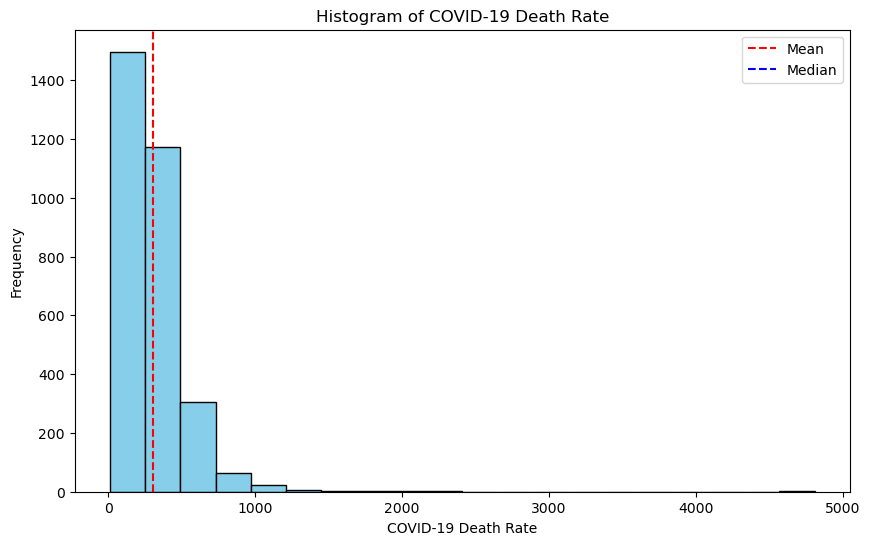

In [17]:
# Create a histogram of the 'COVID-19 Death Rate' column
plt.figure(figsize=(10, 6))
plt.hist(df['COVID-19 Death Rate'], bins=20, color='skyblue', edgecolor='black')

# Plot the line of mean value:
plt.axvline(x=np.mean(df['COVID-19 Death Rate']), c='red', ls='--', label='Mean')

# Plot the line of median value:
plt.axvline(x=np.median(df['COVID-19 Death Rate']), c='blue', ls='--', label='Median')

plt.xlabel('COVID-19 Death Rate')
plt.ylabel('Frequency')
plt.title('Histogram of COVID-19 Death Rate')
plt.legend()
plt.show()


#### Remarks: 

- The distribution histogram above shows that the COVID-19 death rates are highly right-skewed. Therefore, we should apply natural logarithm transformation to make the distribution more normal. 
- Also, log transformation can reduce the impact of outliers by bringing them closer to the rest of the data. This can make correlation analysis later on more representative of the general relationship between variables

In [18]:
# Apply natural logarithm transformation to COVID-19 death rate
df['Log of COVID-19 Death Rate'] = np.log(df['COVID-19 Death Rate'])

In [19]:
# Display the first few rows to verify
df[['covid19_death', 'TOT_POP.0', 'COVID-19 Death Rate']].head()

,covid19_death,TOT_POP.0,COVID-19 Death Rate
0,194.0,59759.0,324.637293
1,649.0,246435.0,263.355449
2,80.0,24706.0,323.807982
3,47.0,22005.0,213.587821
4,102.0,59512.0,171.394005


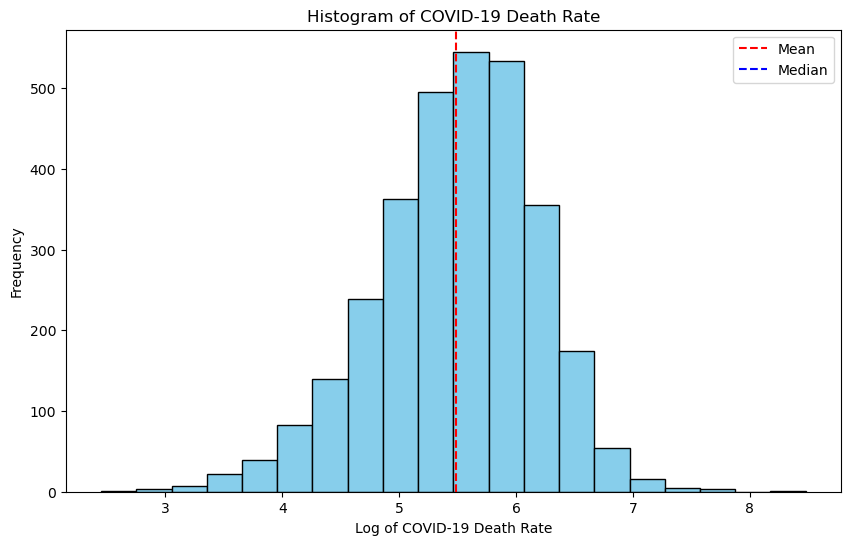

In [20]:
# Log-trasnformed COVID-19 Death Rate
plt.figure(figsize=(10, 6))
plt.hist(df['Log of COVID-19 Death Rate'], bins=20, color='skyblue', edgecolor='black')

# Plot the line of mean value:
plt.axvline(x=np.mean(df['Log of COVID-19 Death Rate']), c='red', ls='--', label='Mean')

# Plot the line of median value:
plt.axvline(x=np.median(df['Log of COVID-19 Death Rate']), c='blue', ls='--', label='Median')

plt.xlabel('Log of COVID-19 Death Rate')
plt.ylabel('Frequency')
plt.title('Histogram of COVID-19 Death Rate')
plt.legend()
plt.show()


In [21]:
# re-check the missing values
df[['covid19_death', 'TOT_POP.0', 'COVID-19 Death Rate']].isnull().sum()

covid19_death          66
TOT_POP.0              11
COVID-19 Death Rate    77
dtype: int64

### Calculate "Total Male Proportion" and "Total Female Proportion"

In [22]:
df['Total Male Proportion'] = df['TOT_MALE.0'] / df['TOT_POP.0']
df['Total Female Proportion'] = df['TOT_FEMALE.0'] / df['TOT_POP.0']

In [23]:
# Display the first few rows to verify
df[['TOT_POP.0', 'Total Male Proportion', 'Total Female Proportion']].head()

,TOT_POP.0,Total Male Proportion,Total Female Proportion
0,59759.0,0.487040,0.512960
1,246435.0,0.487609,0.512391
2,24706.0,0.528778,0.471222
3,22005.0,0.535106,0.464894
4,59512.0,0.497093,0.502907


### Calculate Proportions of Education Levels

In [24]:
# Calculate the total responses of Education level
df['Total Education Level Responses'] = df['Lessthanahighschooldiploma201721_edu'] + \
                                        df['Highschooldiplomaonly201721_edu'] + \
                                        df['Somecollegeorassociatesdegree201721_edu'] + \
                                        df['Bachelorsdegreeorhigher201721_edu']

df['Total Education Level Responses']

0        18436.0
1        30534.0
2         9281.0
3        16269.0
4         9969.0
          ...   
3150    623215.0
3151     31074.0
3152     28466.0
3153     28668.0
3154    128961.0
Name: Total Education Level Responses, Length: 3155, dtype: float64

In [25]:
# Calculate the Proportions of each education level
df['Proportion of Less than HS Dip'] = df['Lessthanahighschooldiploma201721_edu']/df['Total Education Level Responses']
df['Proportion of HS Dip'] = df['Highschooldiplomaonly201721_edu']/df['Total Education Level Responses']
df['Proportion of College Assoc Degree'] = df['Somecollegeorassociatesdegree201721_edu']/df['Total Education Level Responses']
df['Proportion of Bachelor Degree or higher'] = df['Bachelorsdegreeorhigher201721_edu']/df['Total Education Level Responses']

In [26]:
df.columns

Index(['state_county_id', 'SUMLEV', 'STATE', 'COUNTY', 'STNAME', 'CTYNAME',
       'FederalInformationProcessingStandardFIPSCode_edu', 'State_edu',
       'Areaname_edu', 'DeathsfromAllCauses_june2023', 'covid19_death',
       'TOT_POP.0', 'Lessthanahighschooldiploma201721_edu',
       'Highschooldiplomaonly201721_edu',
       'Somecollegeorassociatesdegree201721_edu',
       'Bachelorsdegreeorhigher201721_edu', 'TOT_MALE.0', 'TOT_FEMALE.0',
       'Heart Disease Mortality Rates 35UP', 'COVID-19 Death Rate',
       'Log of COVID-19 Death Rate', 'Total Male Proportion',
       'Total Female Proportion', 'Total Education Level Responses',
       'Proportion of Less than HS Dip', 'Proportion of HS Dip',
       'Proportion of College Assoc Degree',
       'Proportion of Bachelor Degree or higher'],
      dtype='object')

In [27]:
df.dtypes

state_county_id                                       int64
SUMLEV                                               object
STATE                                                object
COUNTY                                               object
STNAME                                               object
CTYNAME                                              object
FederalInformationProcessingStandardFIPSCode_edu      int64
State_edu                                            object
Areaname_edu                                         object
DeathsfromAllCauses_june2023                        float64
covid19_death                                       float64
TOT_POP.0                                           float64
Lessthanahighschooldiploma201721_edu                float64
Highschooldiplomaonly201721_edu                     float64
Somecollegeorassociatesdegree201721_edu             float64
Bachelorsdegreeorhigher201721_edu                   float64
TOT_MALE.0                              

In [28]:
df[['COVID-19 Death Rate', 'Log of COVID-19 Death Rate',
       'Total Male Proportion', 'Total Female Proportion',
       'Proportion of Less than HS Dip', 'Proportion of HS Dip',
       'Proportion of College Assoc Degree',
       'Proportion of Bachelor Degree or higher']]

,COVID-19 Death Rate,Log of COVID-19 Death Rate,Total Male Proportion,Total Female Proportion,Proportion of Less than HS Dip,Proportion of HS Dip,Proportion of College Assoc Degree,Proportion of Bachelor Degree or higher
0,324.637293,5.782709,0.487040,0.512960,0.201779,0.369332,0.300662,0.128227
1,263.355449,5.573505,0.487609,0.512391,0.182387,0.429456,0.252800,0.135357
2,323.807982,5.780151,0.528778,0.471222,0.194160,0.374636,0.314083,0.117121
3,213.587821,5.364048,0.535106,0.464894,0.177761,0.414285,0.269101,0.138853
4,171.394005,5.143965,0.497093,0.502907,0.169927,0.382486,0.313773,0.133815
...,...,...,...,...,...,...,...,...
3150,273.309953,5.610607,0.519265,0.480735,0.108337,0.285730,0.281824,0.324110
3151,81.590587,4.401714,0.524155,0.475845,0.092714,0.360076,0.340413,0.206797
3152,111.046736,4.709951,0.511684,0.488316,0.078269,0.414951,0.336261,0.170519
3153,401.606426,5.995473,0.514704,0.485296,0.053335,0.316695,0.362006,0.267964


## Step 4- Exploratory Data Analysis

### Descriptive Statistics

Compute basic statistics (mean, median, mode, standard deviation) for each column to understand the distributions.

In [29]:
df.describe()

,state_county_id,FederalInformationProcessingStandardFIPSCode_edu,DeathsfromAllCauses_june2023,covid19_death,TOT_POP.0,Lessthanahighschooldiploma201721_edu,Highschooldiplomaonly201721_edu,Somecollegeorassociatesdegree201721_edu,Bachelorsdegreeorhigher201721_edu,TOT_MALE.0,...,Heart Disease Mortality Rates 35UP,COVID-19 Death Rate,Log of COVID-19 Death Rate,Total Male Proportion,Total Female Proportion,Total Education Level Responses,Proportion of Less than HS Dip,Proportion of HS Dip,Proportion of College Assoc Degree,Proportion of Bachelor Degree or higher
count,3155.000000,3155.000000,3089.000000,3089.000000,3.144000e+03,3.144000e+03,3.144000e+03,3.144000e+03,3.144000e+03,3.155000e+03,...,3139.000000,3078.000000,3078.000000,3144.000000,3144.000000,3.144000e+03,3144.000000,3144.000000,3144.000000,3144.000000
mean,30301.200634,29877.170523,3744.780835,367.749110,1.060075e+05,2.385929e+04,5.669374e+04,6.145758e+04,7.211978e+04,5.243358e+04,...,356.986684,302.214347,5.490512,0.504962,0.495038,2.141304e+05,0.120991,0.338699,0.308978,0.231332
std,15201.033141,15010.494046,10526.483944,1174.968209,3.322878e+05,4.613264e+05,1.084587e+06,1.178159e+06,1.384002e+06,1.641926e+05,...,86.761810,222.873526,0.689381,0.023456,0.023456,4.105619e+06,0.059687,0.075224,0.053330,0.099599
min,1001.000000,0.000000,11.000000,5.000000,5.100000e+01,2.000000e+00,9.000000e+00,0.000000e+00,0.000000e+00,4.000000e+01,...,52.200000,11.591784,2.450297,0.422376,0.215686,4.700000e+01,0.006024,0.065471,0.000000,0.000000
25%,18160.000000,18134.000000,377.000000,21.000000,1.076625e+04,8.997500e+02,2.759500e+03,2.328250e+03,1.257500e+03,5.430000e+03,...,297.600000,158.299300,5.064488,0.493507,0.489766,7.590250e+03,0.077532,0.290779,0.273802,0.161369
50%,29165.000000,29117.000000,886.000000,62.000000,2.594400e+04,2.281500e+03,6.562500e+03,5.481000e+03,3.506500e+03,1.312600e+04,...,344.300000,257.672199,5.551688,0.501224,0.498776,1.843100e+04,0.108219,0.340946,0.309865,0.206580
75%,45076.000000,44008.000000,2624.000000,245.000000,6.891600e+04,5.522000e+03,1.643225e+04,1.572275e+04,1.222125e+04,3.483350e+04,...,405.950000,393.517970,5.975127,0.510234,0.506493,5.024550e+04,0.152722,0.391885,0.343640,0.278249
max,56045.000000,55087.000000,276159.000000,32767.000000,9.721138e+06,2.505036e+07,5.963639e+07,6.465674e+07,7.580883e+07,4.826280e+06,...,820.800000,4809.021060,8.478249,0.784314,0.577624,2.251523e+08,0.815534,0.556074,0.769231,0.786988


### Histograms and Box Plots

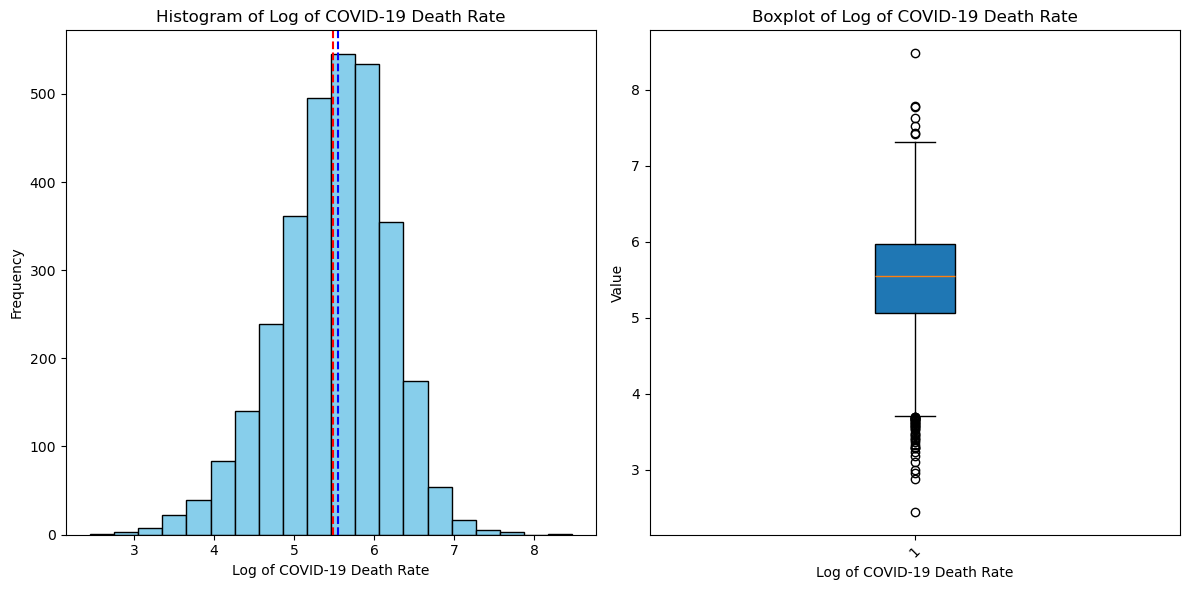

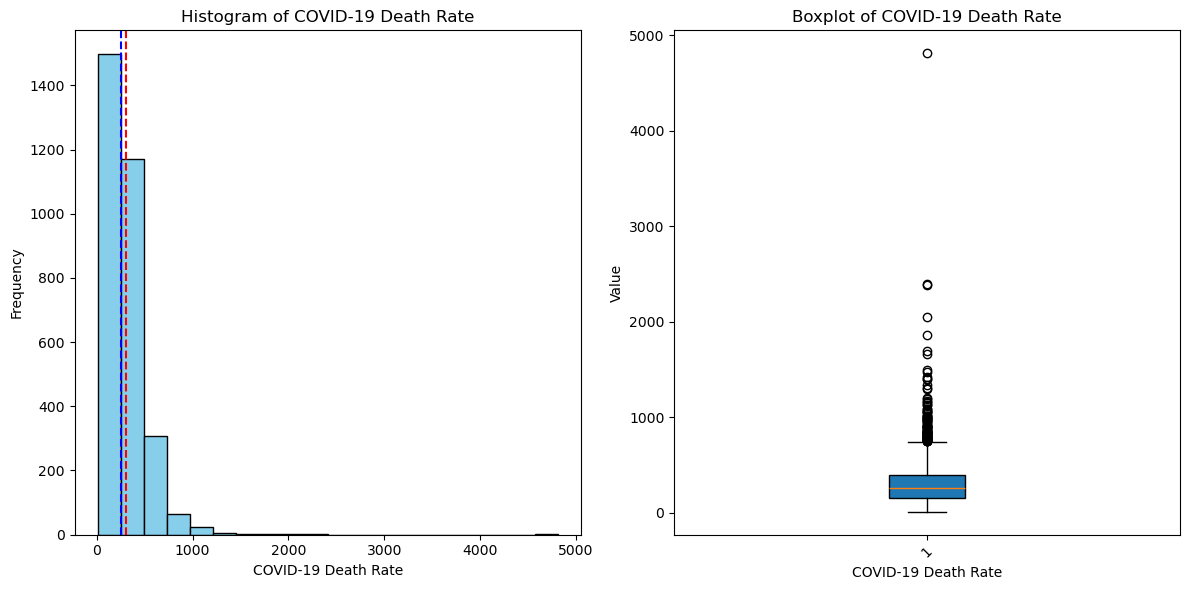

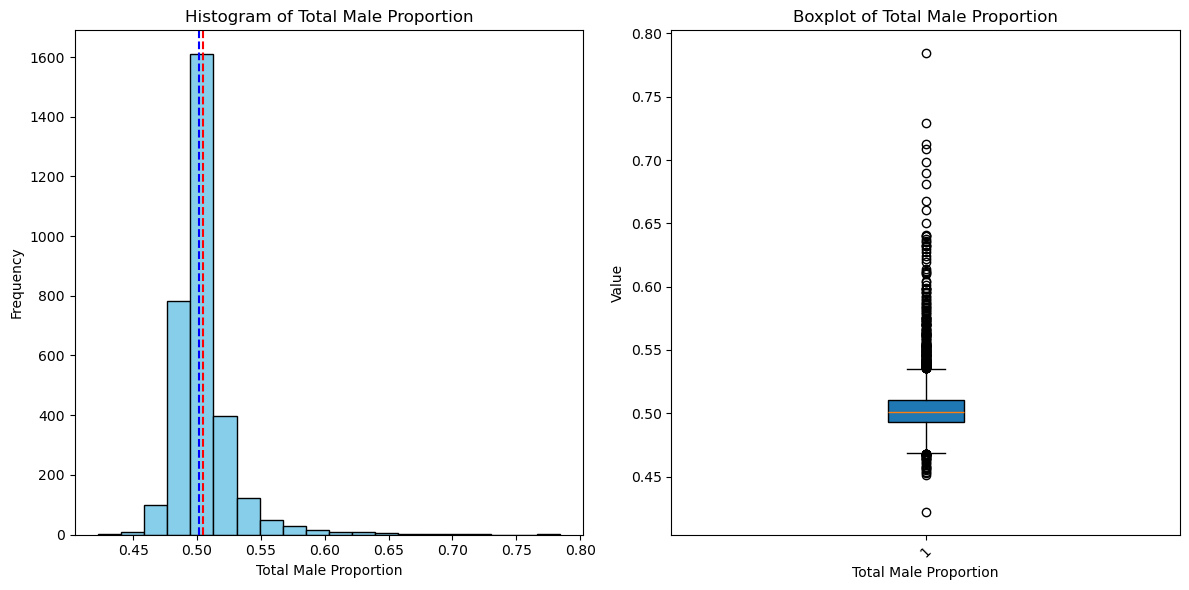

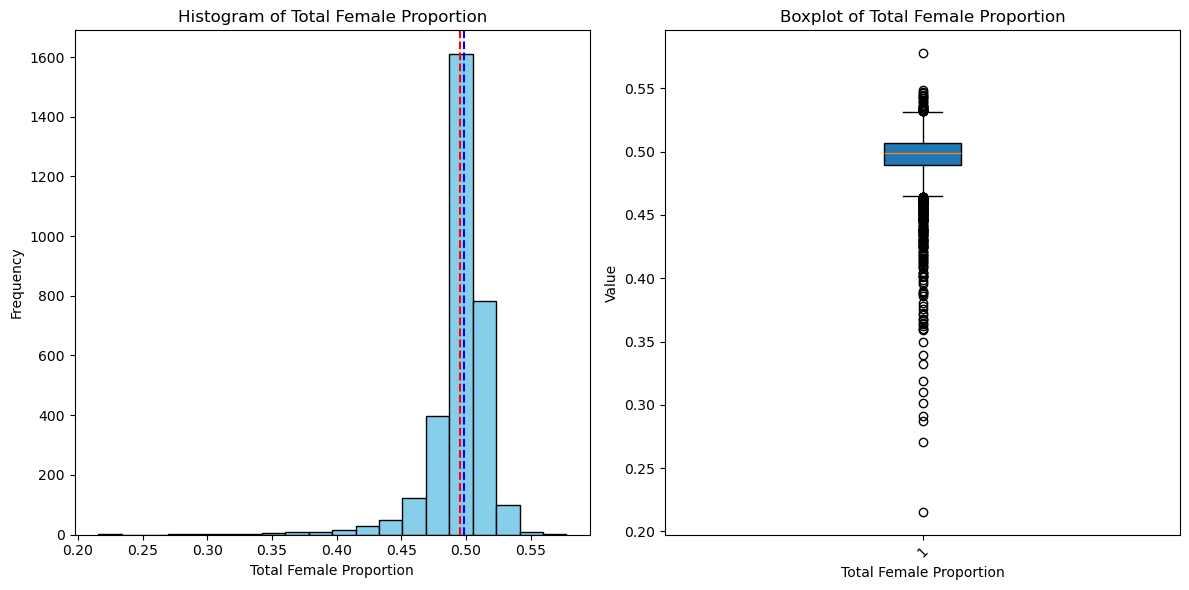

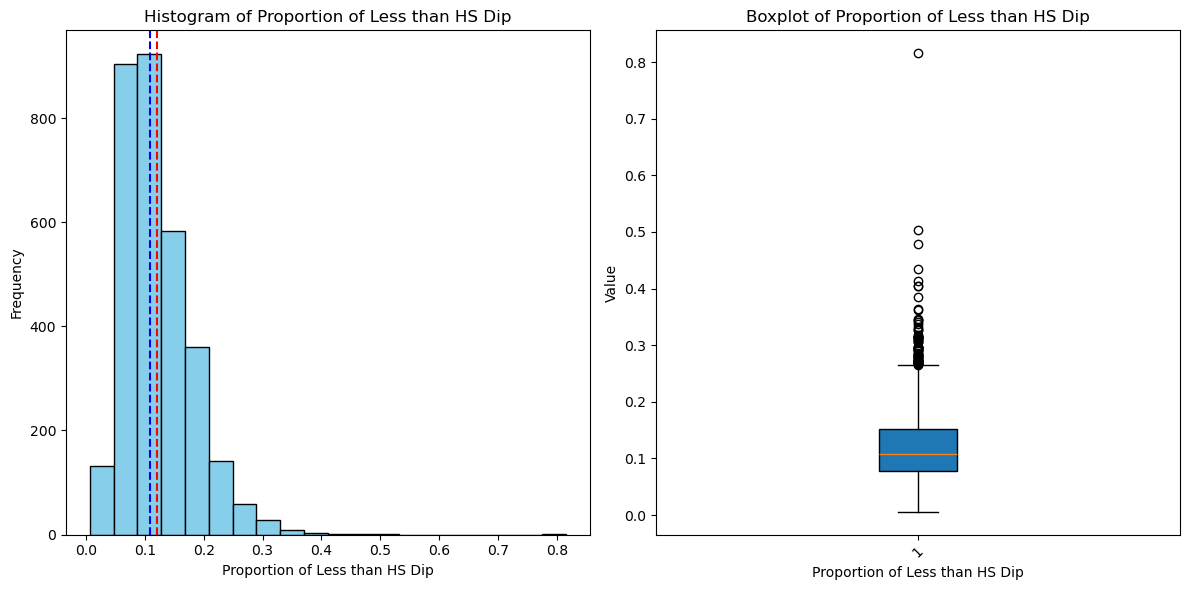

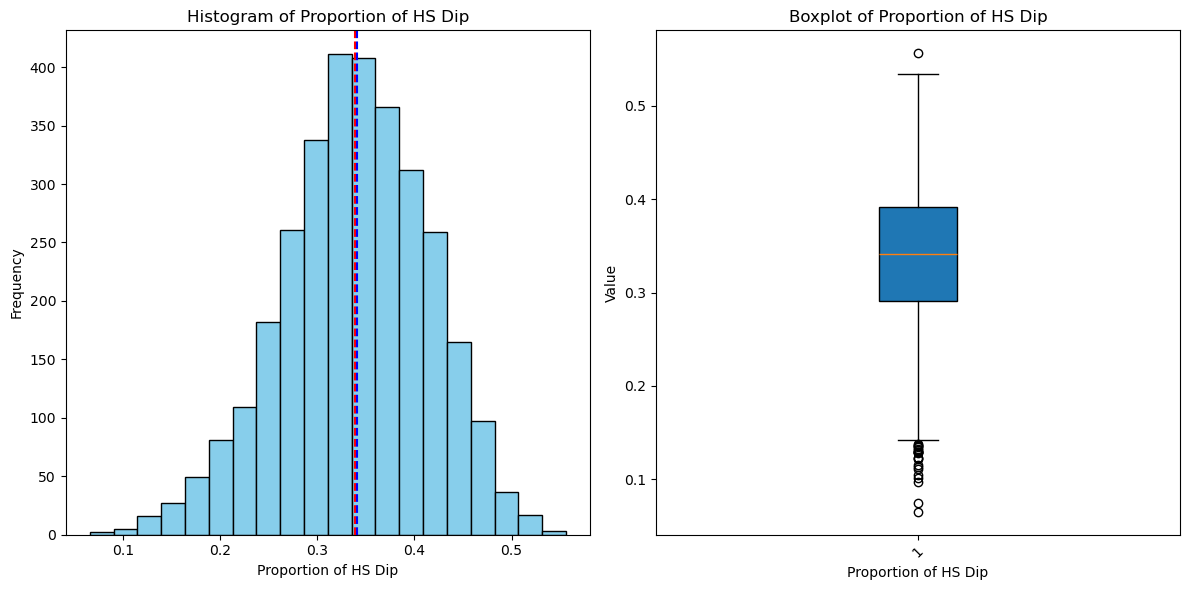

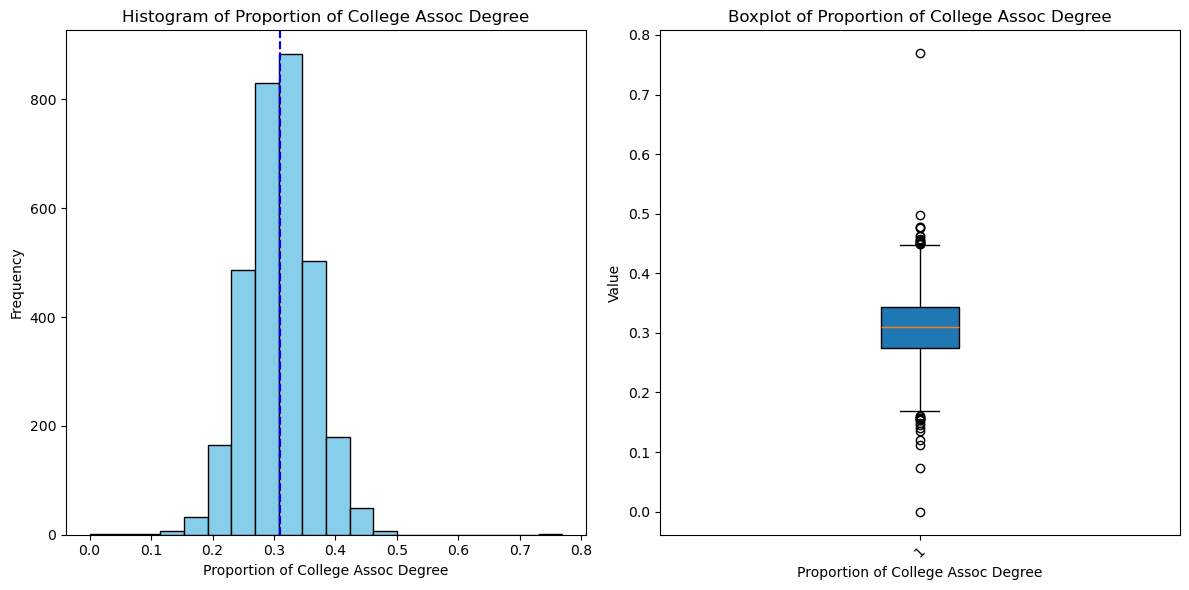

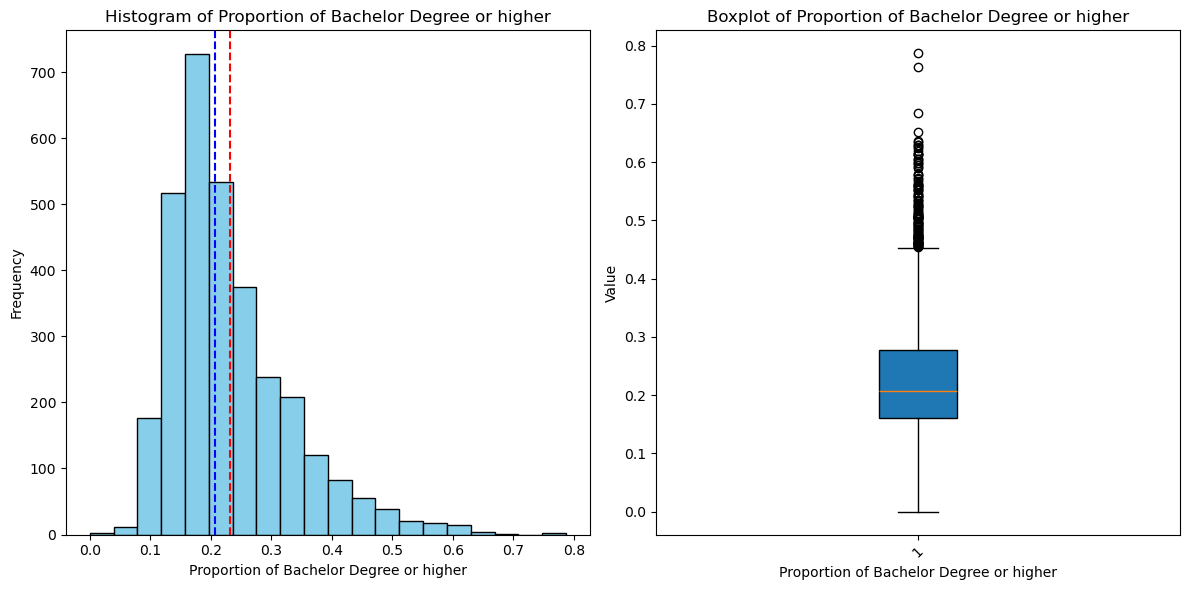

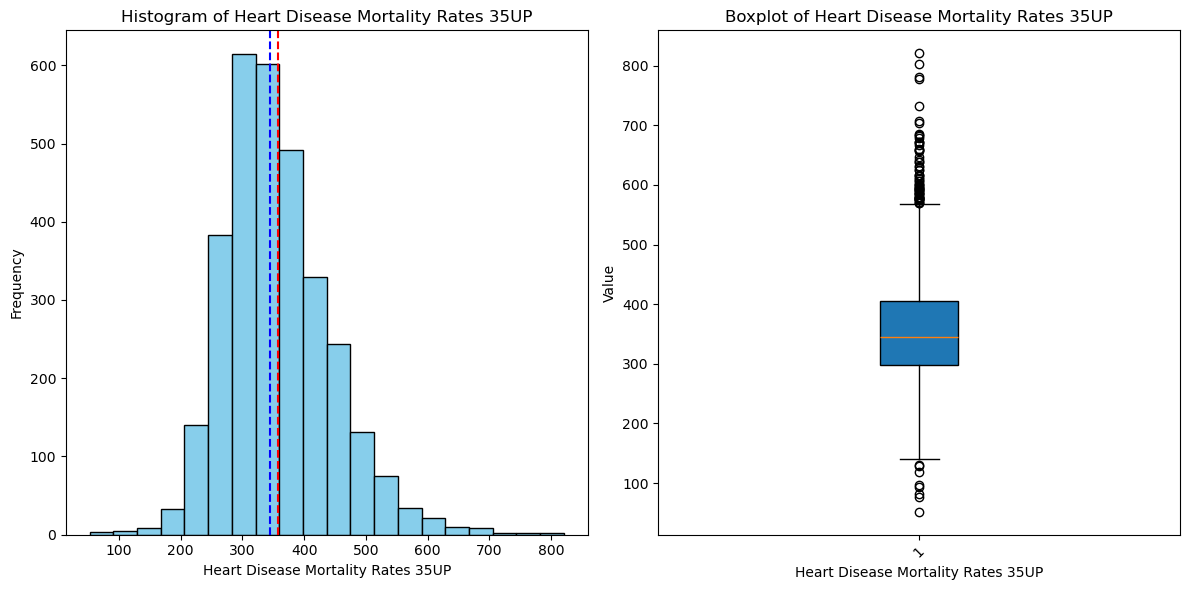

In [30]:
# List of variables to plot
variables_to_plot = ['Log of COVID-19 Death Rate',
                     'COVID-19 Death Rate',
                     'Total Male Proportion', 'Total Female Proportion',
                     'Proportion of Less than HS Dip', 'Proportion of HS Dip',
                     'Proportion of College Assoc Degree',
                     'Proportion of Bachelor Degree or higher',
                    'Heart Disease Mortality Rates 35UP']

# Iterate over each variable in the list
for variable in variables_to_plot:
    # Create a figure with subplots
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
    
    # Plot histogram
    axes[0].hist(df[variable].dropna(), bins=20, color='skyblue', edgecolor='black')
    axes[0].set_title('Histogram of ' + variable)
    axes[0].set_xlabel(variable)
    axes[0].set_ylabel('Frequency')
    axes[0].grid(False)

    # Plot boxplot
    nna_data = df[variable].replace([np.inf, -np.inf], np.nan).dropna()
    axes[1].boxplot(nna_data, patch_artist=True)
    axes[1].set_title(f'Boxplot of {variable}')
    axes[1].set_xlabel(variable)
    axes[1].set_ylabel('Value')
    axes[1].grid(False)
    
    # Plot the line of mean value
    axes[0].axvline(x=np.mean(df[variable].dropna()), c='red', ls='--', label='Mean')

    # Plot the line of median value
    axes[0].axvline(x=np.median(df[variable].dropna()), c='blue', ls='--', label='Median')
    
    # Rotate x-axis labels
    plt.setp(axes[1].xaxis.get_majorticklabels(), rotation=45)
    
    plt.tight_layout()
    plt.show()

## Step 5- Correlation Analysis

We will calculate the Pearson's correlation and create scatter plots (with regression lines) to investigate the correlations and associations between the factors and log-transformed COVID-19 death rates.

#### Heatmap of Correlations

- The colors in the heatmap shows the strengths of correlations between each pair of variables in the matrix.

#### Scatter plot with regression line

- For pairs of variables with a linear relationship, a scatter plot with a regression line can be effective. 
- This plot allows you to see the direction and strength of the correlation between two variables.
- Adding a regression line helps visualize the trend in the data.

### 5.1. COVID-19 Death Rates vs. Gender Proportion

In [31]:
# Subset for correlation
subset = df[['Log of COVID-19 Death Rate',
       'Total Male Proportion', 'Total Female Proportion']].dropna()

# Correlation matrix
correlation_matrix = subset.corr()

# Show correlation matrix
correlation_matrix

,Log of COVID-19 Death Rate,Total Male Proportion,Total Female Proportion
Log of COVID-19 Death Rate,1.00000,-0.23345,0.23345
Total Male Proportion,-0.23345,1.00000,-1.00000
Total Female Proportion,0.23345,-1.00000,1.00000


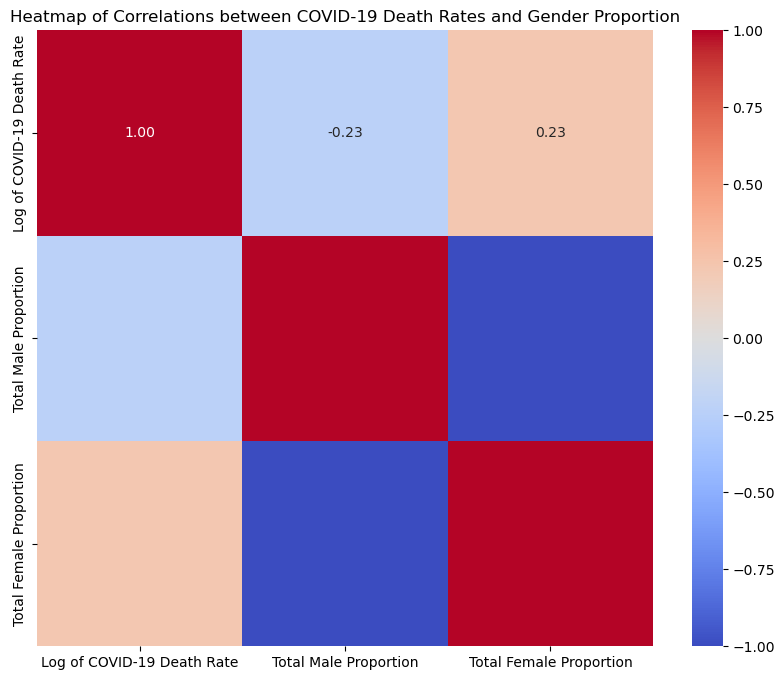

In [32]:
# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Heatmap of Correlations between COVID-19 Death Rates and Gender Proportion')

# Save the plot as a PNG file
plt.savefig('heatmap_gender.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

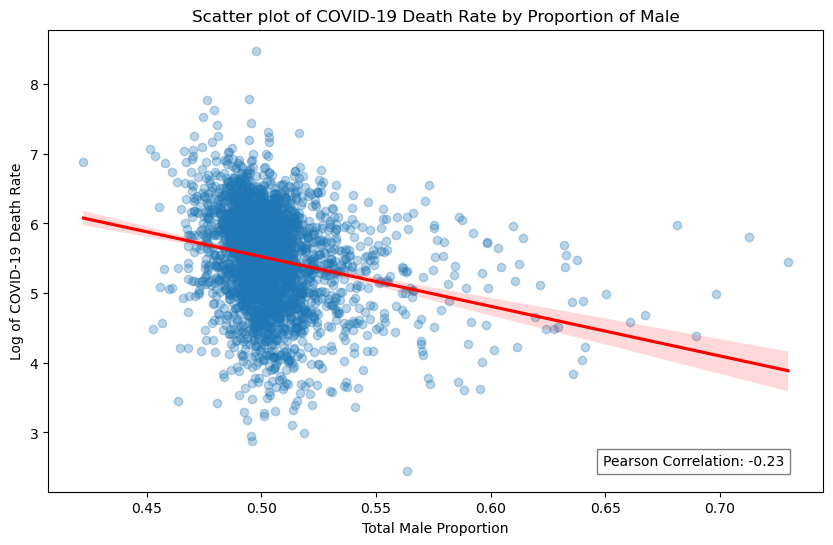

In [33]:
## MALE PROPORTION

# Create a subset of the data without NaN values in the two columns of interest
df_subset = df[['Total Male Proportion', 'Log of COVID-19 Death Rate']].dropna()

# Compute Pearson's correlation using the subset without NaN values
pearson_corr = stats.pearsonr(df_subset['Total Male Proportion'], df_subset['Log of COVID-19 Death Rate'])

# Plotting
plt.figure(figsize=(10, 6))
sns.regplot(x='Total Male Proportion', y='Log of COVID-19 Death Rate', data=df_subset, 
            scatter_kws={'alpha': 0.3}, line_kws={'color': 'red'})

# Add Pearson's correlation coefficient to the plot
plt.text(0.95, 0.05, f'Pearson Correlation: {pearson_corr[0]:.2f}', verticalalignment='bottom',
         horizontalalignment='right', transform=plt.gca().transAxes, fontsize=10, bbox=dict(facecolor='white', alpha=0.5))

plt.title('Scatter plot of COVID-19 Death Rate by Proportion of Male')
plt.xlabel('Total Male Proportion')
plt.ylabel('Log of COVID-19 Death Rate')

# Save the plot as a PNG file
plt.savefig('scatter_plot_male.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

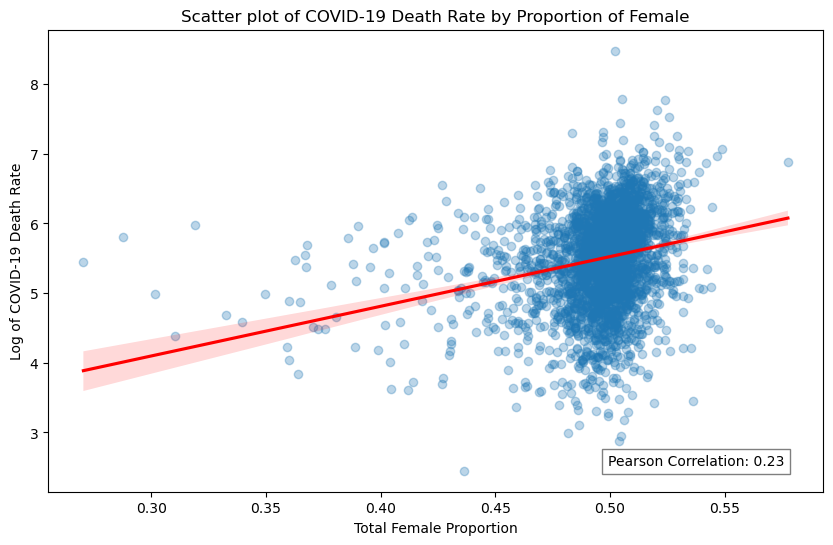

In [34]:
## FEMALE PROPORTION

# Create a subset of the data without NaN values in the two columns of interest
df_subset = df[['Total Female Proportion', 'Log of COVID-19 Death Rate']].dropna()

# Compute Pearson's correlation
pearson_corr = stats.pearsonr(df_subset['Total Female Proportion'], df_subset['Log of COVID-19 Death Rate'])

# Plotting
plt.figure(figsize=(10, 6))
sns.regplot(x='Total Female Proportion', y='Log of COVID-19 Death Rate', data=df_subset, 
            scatter_kws={'alpha': 0.3}, line_kws={'color': 'red'})

# Add Pearson's correlation coefficient to the plot
plt.text(0.95, 0.05, f'Pearson Correlation: {pearson_corr[0]:.2f}', verticalalignment='bottom',
         horizontalalignment='right', transform=plt.gca().transAxes, fontsize=10, bbox=dict(facecolor='white', alpha=0.5))

plt.title('Scatter plot of COVID-19 Death Rate by Proportion of Female')
plt.xlabel('Total Female Proportion')
plt.ylabel('Log of COVID-19 Death Rate')

# Save the plot as a PNG file
plt.savefig('scatter_plot_female.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

### Observations:

#### COVID-19 death rates and the proportion of Males:

- The scatter plot shows a **negative linear trend**, as indicated by the regression line with a negative slope.
- 
The points are dispersed, but there's a discernible downward trend, which suggests that as **the proportion of males increases, the log of COVID-19 death rate decreases**.
- The correlation coefficient of approximately -0.23345 suggests a moderate inverse relationship, which means  that **areas with a higher proportion of males might be associated with lower COVID-19 death rates**, based on the log transformation

#### COVID-19 death rates and the proportion of Females:

- Revserse to the section above for Males.

### 5.2. COVID-19 Death Rates vs. Education Levels

In [35]:
# Subset for correlation
subset = df[['Log of COVID-19 Death Rate',
           'Proportion of Less than HS Dip',
           'Proportion of HS Dip', 
            'Proportion of College Assoc Degree',
            'Proportion of Bachelor Degree or higher']].dropna()

# Correlation matrix
correlation_matrix = subset.corr()

# Show correlation matrix
correlation_matrix

,Log of COVID-19 Death Rate,Proportion of Less than HS Dip,Proportion of HS Dip,Proportion of College Assoc Degree,Proportion of Bachelor Degree or higher
Log of COVID-19 Death Rate,1.000000,-0.027814,0.040963,0.015756,-0.022750
Proportion of Less than HS Dip,-0.027814,1.000000,0.270106,-0.418776,-0.578736
Proportion of HS Dip,0.040963,0.270106,1.000000,-0.237002,-0.791125
Proportion of College Assoc Degree,0.015756,-0.418776,-0.237002,1.000000,-0.104265
Proportion of Bachelor Degree or higher,-0.022750,-0.578736,-0.791125,-0.104265,1.000000


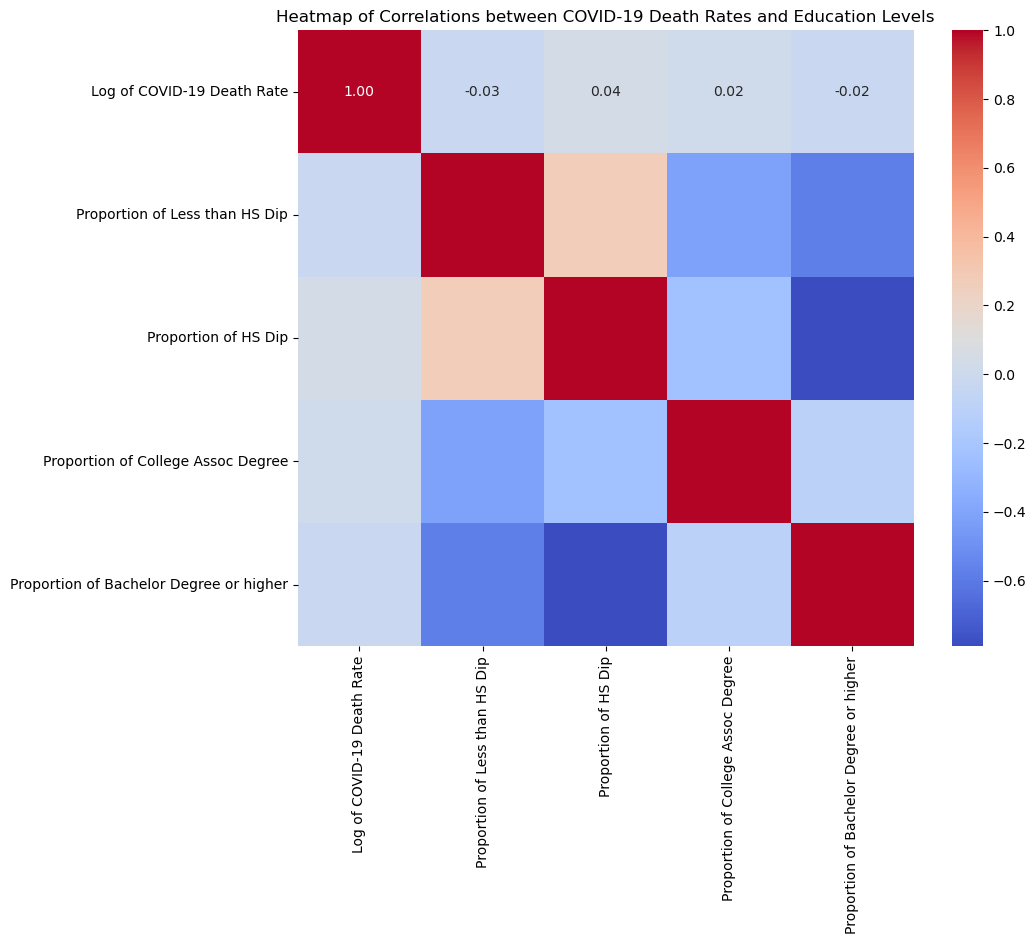

In [36]:
# Create a heatmap
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Heatmap of Correlations between COVID-19 Death Rates and Education Levels')

# Save the plot as a PNG file
plt.savefig('heatmap_education.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

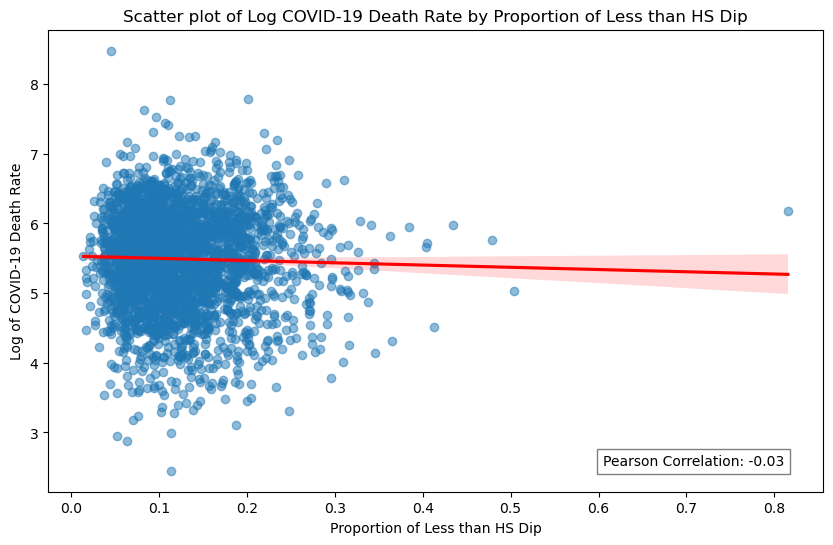

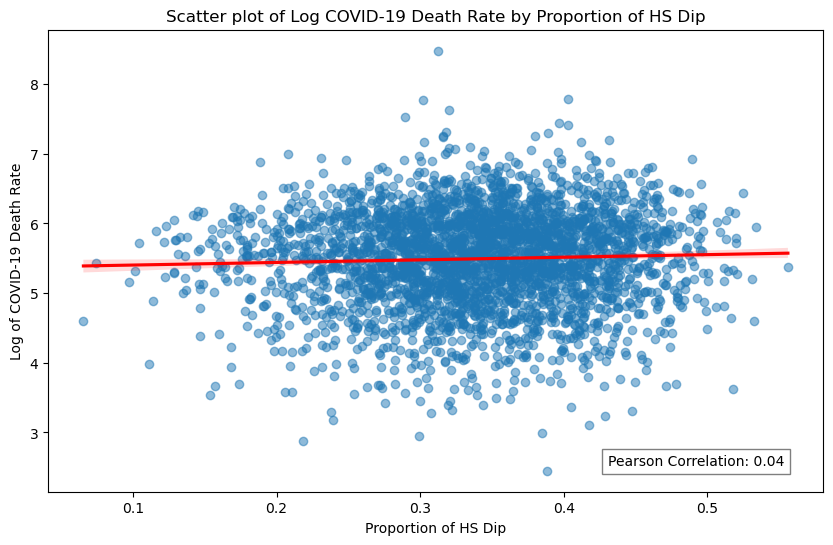

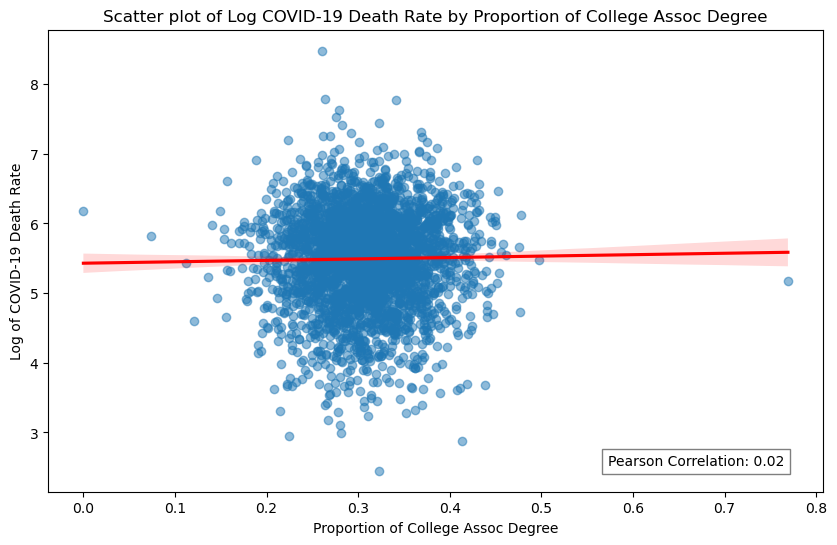

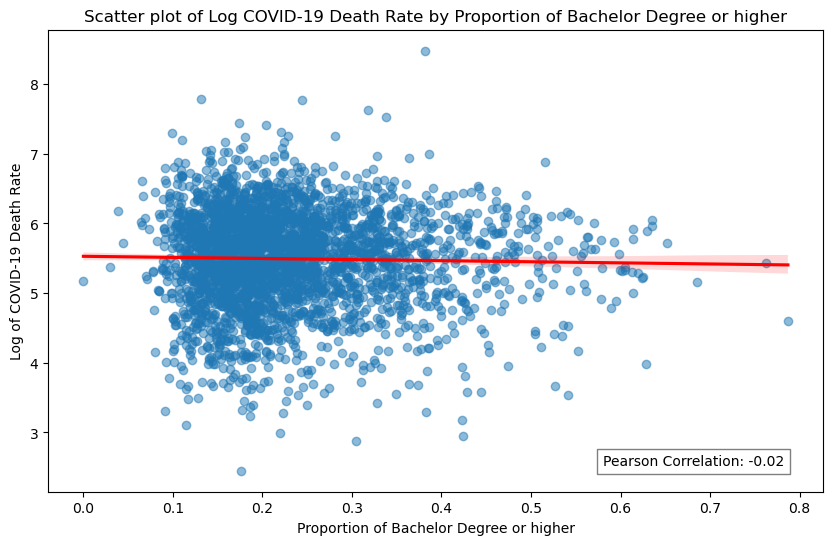

In [37]:
## MULTIPLE SCATTER PLOTS

# Define the variables for multiple scatter plots
variables = [
    'Proportion of Less than HS Dip', 
    'Proportion of HS Dip',
    'Proportion of College Assoc Degree',
    'Proportion of Bachelor Degree or higher',
]

# Loop through each variable and plot
for var in variables:
    plt.figure(figsize=(10, 6))
    
    # Create a subset of the data without NaN values
    df_subset = df[[var, 'Log of COVID-19 Death Rate']].dropna()

    # Compute Pearson's correlation for the subset
    pearson_corr = stats.pearsonr(df_subset[var], df_subset['Log of COVID-19 Death Rate'])

    # Create the scatter plot with regression line
    sns.regplot(x=var, y='Log of COVID-19 Death Rate', data=df_subset, 
                scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
    
    # Add Pearson's correlation coefficient to the plot
    plt.text(0.95, 0.05, f'Pearson Correlation: {pearson_corr[0]:.2f}', verticalalignment='bottom',
             horizontalalignment='right', transform=plt.gca().transAxes, fontsize=10, bbox=dict(facecolor='white', alpha=0.5))
    
    # Set the title, x-label and y-label
    plt.title(f'Scatter plot of Log COVID-19 Death Rate by {var}')
    plt.xlabel(var)
    plt.ylabel('Log of COVID-19 Death Rate')
    
    # Save the plot as a PNG file with a unique file name
    plt.savefig(f'scatter_plot_{var.replace(" ", "_").lower()}.png', dpi=300, bbox_inches='tight')

    # Show the plot
    plt.show()

### Observations:

- The data show **weak or no linear relationships** between the proportions of education levels in the population and the log of COVID-19 death rates *based on the data analyzed*.
- Also, such weak correlations imply that it is hard to use these variables to predict COVID-19 death rates.

### 5.3. COVID-19 Death Rates vs. Heart Disease Mortality Rates

In [38]:
# Subset for correlation
subset = df[['Log of COVID-19 Death Rate','Heart Disease Mortality Rates 35UP']].dropna()

# Correlation matrix
correlation_matrix = subset.corr()

# Show correlation matrix
correlation_matrix

,Log of COVID-19 Death Rate,Heart Disease Mortality Rates 35UP
Log of COVID-19 Death Rate,1.000000,0.179763
Heart Disease Mortality Rates 35UP,0.179763,1.000000


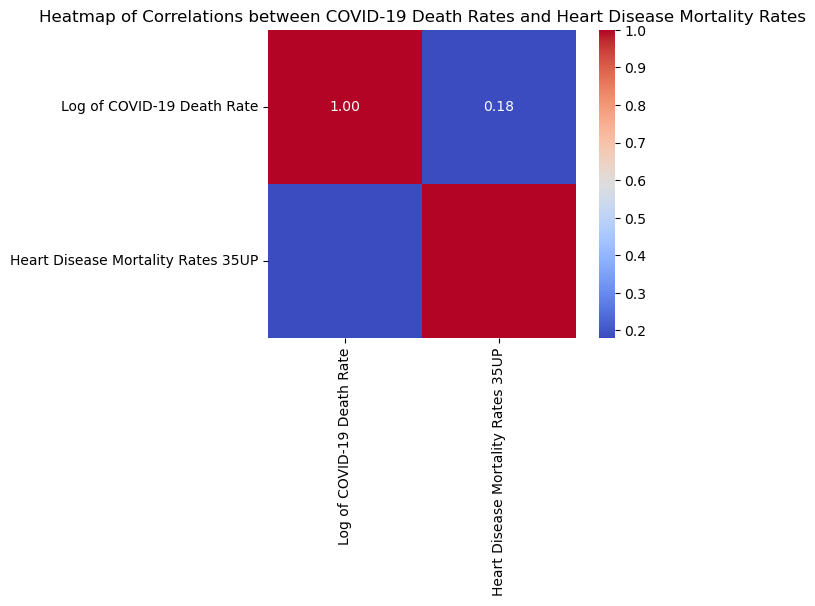

In [39]:
# Create a heatmap
plt.figure(figsize=(6, 4))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Heatmap of Correlations between COVID-19 Death Rates and Heart Disease Mortality Rates')

# Save the plot as a PNG file
plt.savefig('heatmap_heart_disease.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

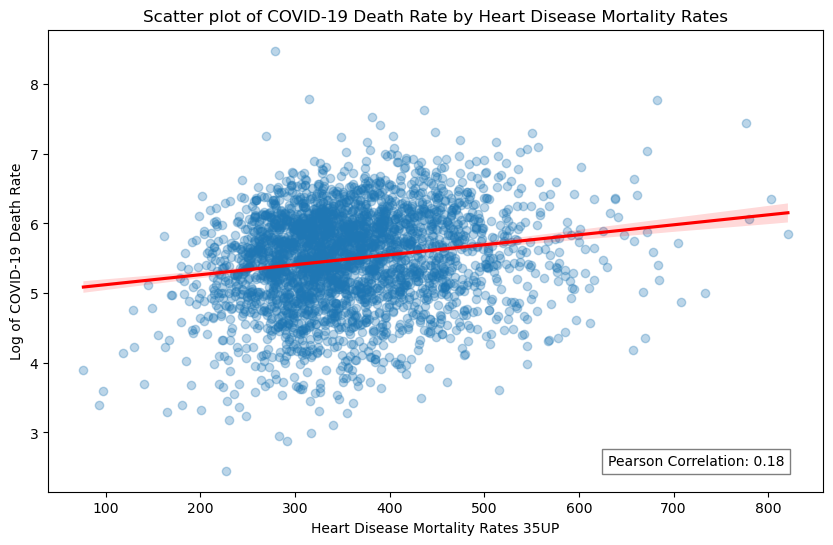

In [40]:
## Heart Disease Mortality Rates
# Create a subset of the data without NaN values in the two columns of interest
df_subset = df[['Heart Disease Mortality Rates 35UP', 'Log of COVID-19 Death Rate']].dropna()

# Compute Pearson's correlation
pearson_corr = stats.pearsonr(df_subset['Heart Disease Mortality Rates 35UP'], df_subset['Log of COVID-19 Death Rate'])

# Plotting
plt.figure(figsize=(10, 6))
sns.regplot(x='Heart Disease Mortality Rates 35UP', y='Log of COVID-19 Death Rate', data=df_subset, 
            scatter_kws={'alpha': 0.3}, line_kws={'color': 'red'})

# Add Pearson's correlation coefficient to the plot
plt.text(0.95, 0.05, f'Pearson Correlation: {pearson_corr[0]:.2f}', verticalalignment='bottom',
         horizontalalignment='right', transform=plt.gca().transAxes, fontsize=10, bbox=dict(facecolor='white', alpha=0.5))

plt.title('Scatter plot of COVID-19 Death Rate by Heart Disease Mortality Rates')
plt.xlabel('Heart Disease Mortality Rates 35UP')
plt.ylabel('Log of COVID-19 Death Rate')

# Save the plot as a PNG file
plt.savefig('scatter_plot_heart_disease.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

### Observations:

- The scatter plot shows a positive trend with a regression line indicating a slight upward slope.
- 
The density of data points is concentrated in the lower to mid-range of heart disease mortality rates, but there is a visible spread throughout the range
- 
The plot shows variability around the regression line but still suggests that as heart disease mortality rates increase, there is a tendency for the COVID-19 death rate to increase as wel
- A correlation coefficient of approximately 0.18 suggests a weak to moderate positive linear relationship between heart disease mortality rates and the log of COVID-19 death rates.l.

## 5.4. Conclusions:

### Gender

- The data shows that gender proportion may play a role in COVID-19 death rates, but it is not the sole or dominant factor, given the moderate strength of the correlation.
- *Based on the provided data and the analysis performed*, we can see there are potential associations where areas with **higher proportions of males** and **lower proportions of females** have **lower COVID-19 death rates**. However, the correlations are still not very strong.

### Education levels

- Based on the correlation coefficients provided, there is **no strong evidence** to suggest a significant linear relationship between the proportion of different education levels in the population and the log of COVID-19 death rates.

### Heart disease mortality rates

- The **weak to moderate positive correlation** indicates that there might be a relationship between heart disease prevalence and COVID-19 severity leading to death, but it is not a strong one. This could be due to underlying health vulnerabilities associated with heart disease that make individuals more susceptible to severe outcomes if they contract COVID-19.
- 
The relationship is not strong enough to suggest that heart disease mortality rates are a major standalone predictor of COVID-19 death rates. 

### Overall & future considerations

- It's important to note that correlation does not imply causation. The weak correlations observed here do not imply that these factors (gender, education levels, etc.) have a causal effect on COVID-19 death rates.
- Further analysis with additional variables and possibly different analytical techniques might be needed to uncover more about the relationships between education levels and COVID-19 outcomes.

## EXTRA

### Recognizing Outliers

- Outliers are typically defined as observations that fall below `Q1 - 1.5IQR` or above `Q3 + 1.5IQR`, where Q1 and Q3 are the first and third quartiles, respectively, and IQR (Interquartile Range) is the difference between them.
- In the boxplots, the points above the upper whisker are potential outliers.
- In the boxplots plotted above, we can see that there is a lot of outliers in most of the boxplots. Therefore, we have to consider a suitable method of handling these outliers because Pearson's correlation method used below will be heavily impacted by outliers.
- Note that, due to heavily skewed distributions of COVID-19 datasets, we will increase the threshold (the "whiskers" of boxplots), so only the most extreme values will be classified as outliers.

### Handling Outliers

- There are various methods of handling outliers such as: selective trimming, using Spearman's rank instead of Pearson's correlation, cutoff threshold, etc. In order to retain the full dataset and not impact other analysese, I will use the "selective trimming" method.
- **Selective trimming** is to only remove the outlier value in the specific columns and keep the rest of the data in that row intact. We could replace the outlier value with a NaN (Not a Number), and then exclude these NaN values from specific calculations. This approach would allow us to perform correlation analysis without the outliers but retain the rest of the data.
- The steps are as below:
  - Replace outliers with NaN.
  - Calculate correlation using `.dropna()`.
  - Scatter plotting using `.dropna()`.

In [41]:
# Create a copy of dataframe
df_clean = df.copy()

# Define a function to replace outliers with NaN using the IQR method
def replace_outliers_with_nan(data, threshold=3):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    
    # Define the bounds for outliers
    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR
    
    # Replace outliers with np.nan
    data = data.apply(lambda x: x if lower_bound <= x <= upper_bound else np.nan)
    return data

In [42]:
# Apply the function to each column you want to clean
columns_to_check = ['Log of COVID-19 Death Rate', 'COVID-19 Death Rate',
                    'Total Male Proportion', 'Total Female Proportion',
                    'Proportion of Less than HS Dip', 'Proportion of HS Dip',
                    'Proportion of College Assoc Degree',
                    'Proportion of Bachelor Degree or higher',
                   'Heart Disease Mortality Rates 35UP']

# Apply the function to each column in the DataFrame
for column in columns_to_check:
    df_clean[column] = replace_outliers_with_nan(df_clean[column])

In [43]:
# Check the number of NaNs introduced in each column
nan_counts = df_clean[columns_to_check].isna().sum()
print(nan_counts)

Log of COVID-19 Death Rate                  77
COVID-19 Death Rate                         99
Total Male Proportion                      104
Total Female Proportion                    104
Proportion of Less than HS Dip              19
Proportion of HS Dip                        11
Proportion of College Assoc Degree          13
Proportion of Bachelor Degree or higher     18
Heart Disease Mortality Rates 35UP          21
dtype: int64


#### Remarks:

- After replacing outliers with NaN, the numbers of NaN are significantly smaller - i.e. less impact on the correlation analysis.

In [44]:
# Subset for correlation
subset = df_clean[['Log of COVID-19 Death Rate',
       'Total Male Proportion', 'Total Female Proportion',
       'Proportion of Less than HS Dip',
       'Proportion of HS Dip', 'Proportion of College Assoc Degree',
       'Proportion of Bachelor Degree or higher',
        'Heart Disease Mortality Rates 35UP']].dropna()

# Correlation matrix
correlation_matrix = subset.corr()

# Show correlation matrix
correlation_matrix

,Log of COVID-19 Death Rate,Total Male Proportion,Total Female Proportion,Proportion of Less than HS Dip,Proportion of HS Dip,Proportion of College Assoc Degree,Proportion of Bachelor Degree or higher,Heart Disease Mortality Rates 35UP
Log of COVID-19 Death Rate,1.000000,-0.234012,0.234012,-0.029251,0.049732,0.020550,-0.032167,0.177006
Total Male Proportion,-0.234012,1.000000,-1.000000,-0.106320,-0.032961,0.106078,0.030172,-0.185797
Total Female Proportion,0.234012,-1.000000,1.000000,0.106320,0.032961,-0.106078,-0.030172,0.185797
Proportion of Less than HS Dip,-0.029251,-0.106320,0.106320,1.000000,0.298673,-0.407308,-0.589984,0.171739
Proportion of HS Dip,0.049732,-0.032961,0.032961,0.298673,1.000000,-0.269055,-0.795755,0.174612
Proportion of College Assoc Degree,0.020550,0.106078,-0.106078,-0.407308,-0.269055,1.000000,-0.091579,-0.117191
Proportion of Bachelor Degree or higher,-0.032167,0.030172,-0.030172,-0.589984,-0.795755,-0.091579,1.000000,-0.170655
Heart Disease Mortality Rates 35UP,0.177006,-0.185797,0.185797,0.171739,0.174612,-0.117191,-0.170655,1.000000


### Heatmap

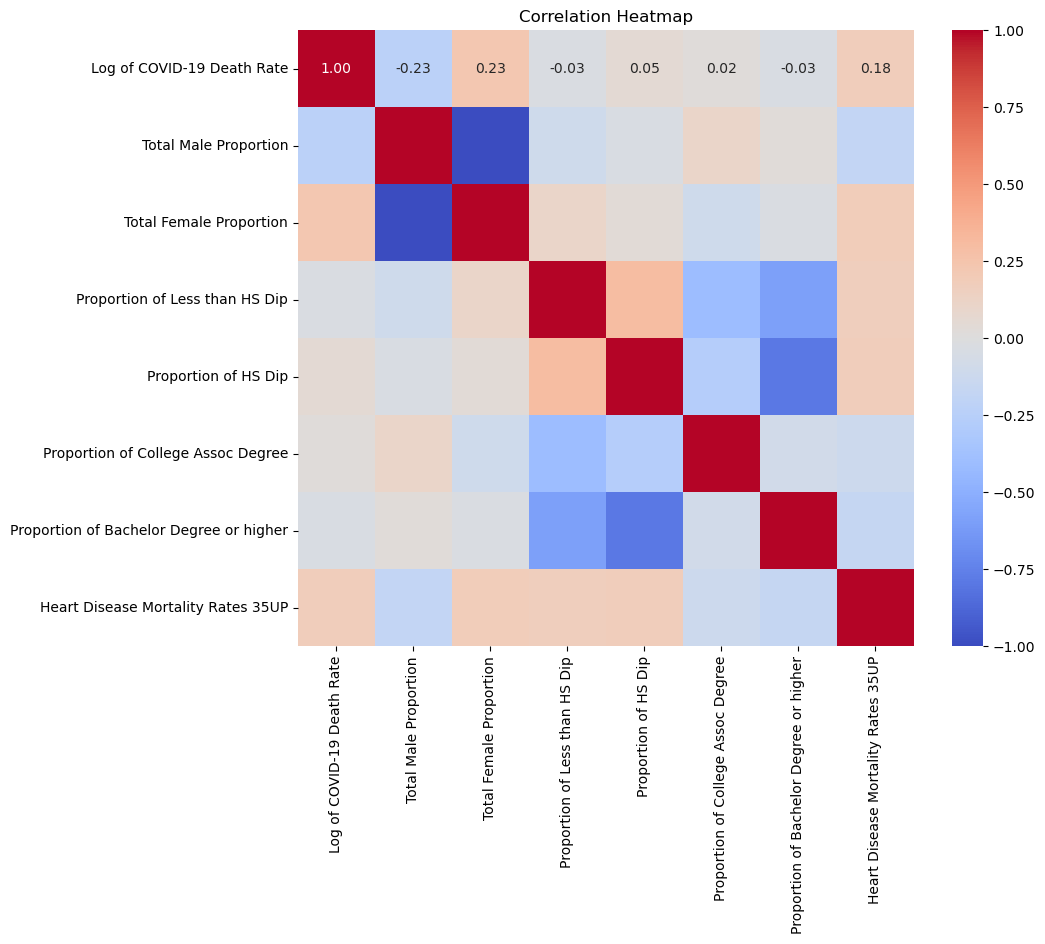

In [45]:
# Create a heatmap
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Heatmap')
plt.show()

### Observations:

#### Gender Proportions:

- Both `'Total Male Proportion'` and `'Total Female Proportion'` have **a very weak correlation** (less than 0.1) with the `'Log of COVID-19 Death Rate'`, with coefficients close to zero. This suggests that within this dataset, there's **no strong linear relationship** between the gender distribution and the COVID-19 death rate.

#### Education Levels:

- `'Proportion of Less than HS Dip'` (High School Diploma) and `'Proportion of HS Dip'` have **very weak positive correlations** with the `'Log of COVID-19 Death Rate'`.
- `'Proportion of College Assoc Degree'` has a **weak positive correlation** with the `'Log of COVID-19 Death Rate'`, suggesting that higher education levels may have **a very slight association** with higher COVID-19 death rates.
- `'Proportion of Bachelor Degree or higher'` has **a weak negative correlation** with the `'Log of COVID-19 Death Rate'`. This means that as the proportion of individuals with at least a bachelor's degree increases, there is a slight tendency for the COVID-19 death rate to decrease, but **the relationship is not strong** based on this coefficient.

### Conclusions:

#### Education: 

- The very weak negative correlation between education levels and the 'Log of COVID-19 Death Rate' suggests that there is **no substantial linear association** between higher education levels and COVID-19 death rates *within the data provided*.

#### Gender:

- The weak correlations between 'Total Male Proportion' and 'Total Female Proportion' with the 'Log of COVID-19 Death Rate' (correlation coefficients: -0.093523 and 0.093838, respectively) suggest that there is **no meaningful linear relationship** between the gender proportion within a population and the COVID-19 death rates. 
- This would imply that gender distribution, by itself, is not a strong predictor of COVID-19 mortality rates *in the dataset being analyzed*.

### Scatter plot with regression line

- For pairs of variables with a linear relationship, a scatter plot with a regression line can be effective. 
- This plot allows you to see the direction and strength of the correlation between two variables.
- Adding a regression line helps visualize the trend in the data.